# **Part 1: Solution of Non-Linear Systems**

Made by:
- Haiber Alfredo Alpala
- Juan Pablo Gomez Gomez
- Juan Diego Ospina Ocampo
- Jose Fernando Portilla Roser
- David Delgado Ortiz
- Jacobo Zapata Rojas
- Maria Paula Ardila Otero
- Mariana Valencia 
- Samuel Mira Álvarez

## **Inverse Kinematics of a 2-Link Planar Robot Arm**

Modern robotics requires autonomous systems to perform tasks with precision. One of the fundamental problems is inverse kinematics, that is, determining the angles that the joints of a robotic arm must adopt to reach a desired position in the plane (or space). This problem gives rise to systems of nonlinear equations, whose solution requires appropriate numerical methods. 

### *Description of the problem*

Consider a planar robotic arm composed of two links of lengths $L_{1}$ and $L_{2}$, articulated by angles $\theta_{1}$ (formed by the first link with the support base) and $\theta_{2}$ (formed by the second link with respect to the first).

The position of the end of the arm in the plane (in Cartesian coordinates) is given by:
$$
\begin{align*}
x(\theta_{1}, \theta_{2}) = L_{1} \cos (\theta_{1}) + L_{2} \cos (\theta_{1} + \theta_{2}) \\
y(\theta_{1}, \theta_{2}) = L_{1} \sin (\theta_{1}) + L_{2} \sin (\theta_{1} + \theta_{2})
\end{align*}
$$

To reach a desired point $(x_{d}, y_{d})$, the nonlinear system is considered:
$$
\begin{align*}
F_{1}(\theta_{1}, \theta_{2}) = x(\theta_{1}, \theta_{2}) - x_{d} = 0 \\
F_{2}(\theta_{1}, \theta_{2}) = y(\theta_{1}, \theta_{2}) - y_{d} = 0
\end{align*}
$$



In [1]:
# Import dependencies here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Part 1
Implement Newton's Method to solve the resulting non-linear system. 

Here goes activity 1. 

### Part 2
Choose realistic values for $L_{1}$, $L_{2}$ and at least three final positions $(x_{d}, y_{d})$ and evaluate the results of the method.

Here goes activity 2.

### Part 3
Analyze the sensibility of the initial conditions and discuss the cases in which the method converges and difficulties in implementation.  

Here goes activity 3.

### Part 4
Visualize the final end positions and the intermediate trajectories of the arm. 

Here goes activity 4. 

### Part 5
Generalize the model to an arm with $n \geq 3$ links. In this case, the system is composed of $n$ non-linear equations and the number of solutions can increase substantially. 

#### Intuition


After the development done above, it is now tasked to generalize the model for a robotic arm with more than $2$ links. 

Although daunting at first glance, the problem is rather straightforward. The following graphic serves as an illustration to further clear doubts. 


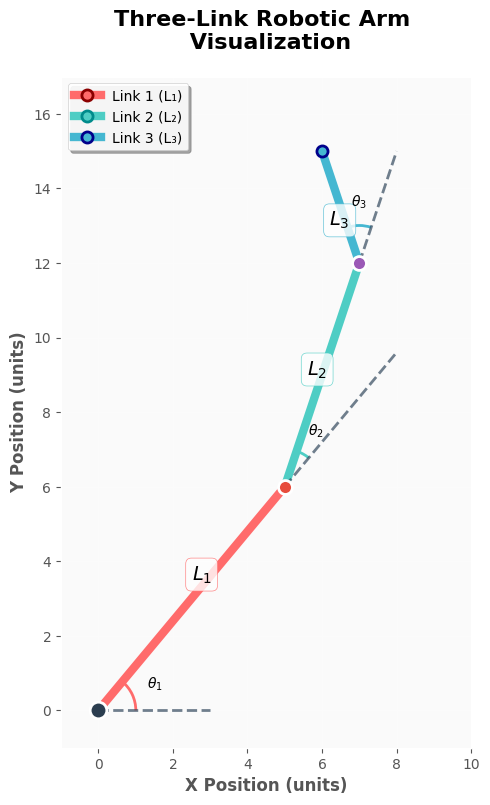

In [2]:
'''
The following class is miscellaneous code for the graphic. It can be found at:
https://matplotlib.org/stable/gallery/text_labels_and_annotations/angle_annotation.html#sphx-glr-gallery-text-labels-and-annotations-angle-annotation-py
'''
from matplotlib.patches import Arc
from matplotlib.transforms import Bbox, IdentityTransform, TransformedBbox
import matplotlib.pyplot as plt
plt.style.use("ggplot")


class AngleAnnotation(Arc):
    """
    Draws an arc between two vectors which appears circular in display space.
    """
    def __init__(self, xy, p1, p2, size=75, unit="points", ax=None,
                 text="", textposition="inside", text_kw=None, **kwargs):
        """
        Parameters
        ----------
        xy, p1, p2 : tuple or array of two floats
            Center position and two points. Angle annotation is drawn between
            the two vectors connecting *p1* and *p2* with *xy*, respectively.
            Units are data coordinates.

        size : float
            Diameter of the angle annotation in units specified by *unit*.

        unit : str
            One of the following strings to specify the unit of *size*:

            * "pixels": pixels
            * "points": points, use points instead of pixels to not have a
              dependence on the DPI
            * "axes width", "axes height": relative units of Axes width, height
            * "axes min", "axes max": minimum or maximum of relative Axes
              width, height

        ax : `matplotlib.axes.Axes`
            The Axes to add the angle annotation to.

        text : str
            The text to mark the angle with.

        textposition : {"inside", "outside", "edge"}
            Whether to show the text in- or outside the arc. "edge" can be used
            for custom positions anchored at the arc's edge.

        text_kw : dict
            Dictionary of arguments passed to the Annotation.

        **kwargs
            Further parameters are passed to `matplotlib.patches.Arc`. Use this
            to specify, color, linewidth etc. of the arc.

        """
        self.ax = ax or plt.gca()
        self._xydata = xy  # in data coordinates
        self.vec1 = p1
        self.vec2 = p2
        self.size = size
        self.unit = unit
        self.textposition = textposition

        super().__init__(self._xydata, size, size, angle=0.0,
                         theta1=self.theta1, theta2=self.theta2, **kwargs)

        self.set_transform(IdentityTransform())
        self.ax.add_patch(self)

        self.kw = dict(ha="center", va="center",
                       xycoords=IdentityTransform(),
                       xytext=(0, 0), textcoords="offset points",
                       annotation_clip=True)
        self.kw.update(text_kw or {})
        self.text = ax.annotate(text, xy=self._center, **self.kw)

    def get_size(self):
        factor = 1.
        if self.unit == "points":
            factor = self.ax.figure.dpi / 72.
        elif self.unit[:4] == "axes":
            b = TransformedBbox(Bbox.unit(), self.ax.transAxes)
            dic = {"max": max(b.width, b.height),
                   "min": min(b.width, b.height),
                   "width": b.width, "height": b.height}
            factor = dic[self.unit[5:]]
        return self.size * factor

    def set_size(self, size):
        self.size = size

    def get_center_in_pixels(self):
        """return center in pixels"""
        return self.ax.transData.transform(self._xydata)

    def set_center(self, xy):
        """set center in data coordinates"""
        self._xydata = xy

    def get_theta(self, vec):
        vec_in_pixels = self.ax.transData.transform(vec) - self._center
        return np.rad2deg(np.arctan2(vec_in_pixels[1], vec_in_pixels[0]))

    def get_theta1(self):
        return self.get_theta(self.vec1)

    def get_theta2(self):
        return self.get_theta(self.vec2)

    def set_theta(self, angle):
        pass

    # Redefine attributes of the Arc to always give values in pixel space
    _center = property(get_center_in_pixels, set_center)
    theta1 = property(get_theta1, set_theta)
    theta2 = property(get_theta2, set_theta)
    width = property(get_size, set_size)
    height = property(get_size, set_size)

    # The following two methods are needed to update the text position.
    def draw(self, renderer):
        self.update_text()
        super().draw(renderer)

    def update_text(self):
        c = self._center
        s = self.get_size()
        angle_span = (self.theta2 - self.theta1) % 360
        angle = np.deg2rad(self.theta1 + angle_span / 2)
        r = s / 2
        if self.textposition == "inside":
            r = s / np.interp(angle_span, [60, 90, 135, 180],
                                          [3.3, 3.5, 3.8, 4])
        self.text.xy = c + r * np.array([np.cos(angle), np.sin(angle)])
        if self.textposition == "outside":
            def R90(a, r, w, h):
                if a < np.arctan(h/2/(r+w/2)):
                    return np.sqrt((r+w/2)**2 + (np.tan(a)*(r+w/2))**2)
                else:
                    c = np.sqrt((w/2)**2+(h/2)**2)
                    T = np.arcsin(c * np.cos(np.pi/2 - a + np.arcsin(h/2/c))/r)
                    xy = r * np.array([np.cos(a + T), np.sin(a + T)])
                    xy += np.array([w/2, h/2])
                    return np.sqrt(np.sum(xy**2))

            def R(a, r, w, h):
                aa = (a % (np.pi/4))*((a % (np.pi/2)) <= np.pi/4) + \
                     (np.pi/4 - (a % (np.pi/4)))*((a % (np.pi/2)) >= np.pi/4)
                return R90(aa, r, *[w, h][::int(np.sign(np.cos(2*a)))])

            bbox = self.text.get_window_extent()
            X = R(angle, r, bbox.width, bbox.height)
            trans = self.ax.figure.dpi_scale_trans.inverted()
            offs = trans.transform(((X-s/2), 0))[0] * 72
            self.text.set_position([offs*np.cos(angle), offs*np.sin(angle)])
            
'''
Now, the graphic may be constructed. 
'''
# Create the figure
fig, ax = plt.subplots(figsize=(5, 10))
fig.canvas.draw() 

# Set title and labels
ax.set_title("Three-Link Robotic Arm \n Visualization", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("X Position (units)", fontsize=12, fontweight='bold')
ax.set_ylabel("Y Position (units)", fontsize=12, fontweight='bold')

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Define coordinates and link segments
center0 = (0,0)
center1 = (5, 6)
center2 = (7,12)
p1 = [(0, 0), (5, 6)]
p2 = [(5,6), (7, 12)]
p3 = [(7,12), (6, 15)]

# 
line1, = ax.plot(*zip(*p1), color="#FF6B6B", linewidth=6, label="Link 1 (L₁)", 
                 marker='o', markersize=8, markeredgecolor='darkred', markeredgewidth=2)
line2, = ax.plot(*zip(*p2), color="#4ECDC4", linewidth=6, label="Link 2 (L₂)", 
                 marker='o', markersize=8, markeredgecolor='darkcyan', markeredgewidth=2)
line3, = ax.plot(*zip(*p3), color="#45B7D1", linewidth=6, label="Link 3 (L₃)", 
                 marker='o', markersize=8, markeredgecolor='darkblue', markeredgewidth=2)

point0, = ax.plot(*center0, marker="o", markersize=12, color="#2C3E50", 
                  markeredgecolor='white', markeredgewidth=2, zorder=5)
point1, = ax.plot(*center1, marker="o", markersize=10, color="#E74C3C", 
                  markeredgecolor='white', markeredgewidth=2, zorder=5)
point2, = ax.plot(*center2, marker="o", markersize=10, color="#9B59B6", 
                  markeredgecolor='white', markeredgewidth=2, zorder=5)

ax.text(2.5, 3.5, r"$L_{1}$", fontsize=14, fontweight='bold', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='#FF6B6B', alpha=0.8))
ax.text(5.6, 9, r"$L_{2}$", fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='#4ECDC4', alpha=0.8))
ax.text(6.2, 13, r"$L_{3}$", fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='#45B7D1', alpha=0.8))

# Create reference lines for angles
p0_a = [(0,0), (3,0)]
p1_a = [(5,6), (8,9.6)]
p2_a = [(7,12), (8,15)]
aux_line_0 = ax.plot(*zip(*p0_a), linestyle="--", color="#34495E", alpha=0.7, linewidth=2)
aux_line_1 = ax.plot(*zip(*p1_a), linestyle="--", color="#34495E", alpha=0.7, linewidth=2)
aux_line_2 = ax.plot(*zip(*p2_a), linestyle="--", color="#34495E", alpha=0.7, linewidth=2)

# Angle annotations
am1 = AngleAnnotation(center0, p0_a[0], p1[1], ax=ax, size=75, text=r"$\theta_{1}$", 
                     textposition="outside", color="#FF6B6B", linewidth=2)
am2 = AngleAnnotation(center1, p1_a[1], p2[1], ax=ax, size=75, text=r"$\theta_{2}$", 
                     textposition="outside", color="#4ECDC4", linewidth=2)
am3 = AngleAnnotation(center2, p2_a[1], p3[1], ax=ax, size=75, text=r"$\theta_{3}$", 
                     textposition="outside", color="#45B7D1", linewidth=2)

# Legend
ax.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, 
          shadow=True, framealpha=0.9, facecolor='white')

# Set axis limits for better visualization
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 17)

# Equal aspect ratio for proper geometric representation
ax.set_aspect('equal', adjustable='box')

# Add subtle background color
ax.set_facecolor('#FAFAFA')

plt.tight_layout()
plt.show()

There is a clear pattern forming. Analyzing it in the same way the first proposed problem, the 2-linked robotic arm, was analyzed, it is noticeable that the coordinates for the end points of each link are dependent on the angles that said links make with the direction of the link before them, which in turn is dependent on the angle it makes with the one before them. It is a composition of the angles that then determine how each of the $L_{i}$'s "contributes" to the position of each coordinate. 

It is clear that, for this case, the position of the end of the arm in cartesian coordinates is given by the following equations:
$$
\begin{align*}
x(\theta_{1}, \theta_{2}, \theta_{3}) = L_{1} \cos (\theta_{1}) + L_{2} \cos (\theta_{1} + \theta_{2}) + L_{3} \cos (\theta_{1} + \theta_{2} + \theta_{3}) \\
y(\theta_{1}, \theta_{2}, \theta_{3}) = L_{1} \sin (\theta_{1}) + L_{2} \sin (\theta_{1} + \theta_{2}) + L_{3} \sin (\theta_{1} + \theta_{2} + \theta_{3})
\end{align*}
$$ 
The resulting linear system is as follows:
$$
\begin{align*}
F_{1}(\theta_{1}, \theta_{2}, \theta_{3}) = x(\theta_{1}, \theta_{2}, \theta_{3}) - x_{d} = 0 \\
F_{2}(\theta_{1}, \theta_{2}, \theta_{3}) = y(\theta_{1}, \theta_{2}, \theta_{3}) - y_{d} = 0
\end{align*}
$$

Now, understanding the structure of the problem, one may generalize its form. Suppose now that there is a robotic arm with $n$ links, and the objective is the same as before: Find a configuration in which the robotic arm's extreme may reach an end point $(x_{d}, y_{d})$. 

In this configuration, each link has an associated length $L_{i}$ and an associated angle $\theta_{i}$, with $i \in \{1,2,\dots,n\}$, where $\theta_{1}$ is the angle that the first link makes with the x-axis, $\theta_{2}$ is the angle that the second link makes with respect to the direction of the first link, $\theta_{3}$ is the one the third link makes with the second link, and so on. We incur in the following notation to express the vectors comprised of the lengths of the links and the angles of the links:
$$
\begin{align*}
\boldsymbol{L} = [L_{1}, \ L_{2}, \ \dots, \ L_{n}]^{T} \\
\boldsymbol{\theta} = [\theta_{1}, \ \theta_{2}, \ \dots, \ \theta_{n}]^{T}
\end{align*}
$$

The resulting equations for the positions for the extreme of the robotic arm are as follows:
$$
\begin{align*}
x(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \cos \left(\sum_{j=1}^{i} \theta_{j}\right) \\
y(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \sin \left(\sum_{j=1}^{i} \theta_{j}\right)
\end{align*}
$$
And the corresponding system of equations is, of course:
$$
\begin{align*}
F_{1}(\boldsymbol{\theta}) = x(\boldsymbol{\theta}) - x_{d} = 0 \\
F_{2}(\boldsymbol{\theta}) = y(\boldsymbol{\theta}) - y_{d} = 0
\end{align*}
$$

Again, it is important to see if a given end point is reachable with the arm. The upper bound is clear.
$$
\sqrt{x_{d}^{2} + y_{d}^{2}} \leq \sum_{i = 1}^{n} L_{i}
$$

The lower bound, not so much. In the case with $n = 2$ links, the closest you could get to the origin (equivalently, the closest you could get the arm to its "base"), was obtained by throwing out the first link in any direction, and then putting the other link in the reverse direction, trying to get back to the zero point. This would result in how close can the end point be while being reachable, which results in the constraint that appears above. When trying this with $3$ links, however, the process isn't that simple. Trying to put all links on the same line (making their respective angles either $180°$ or $360°$ degrees) won't always give the closest distance; angling the links _just right_ might probably get closer, or even exactly to, the zero point. 

The trick is in the angling. The reasoning is this, supposing that $n \geq 3$: Put the first link in any direction. Put the following links all facing the opposite direction to that first link. If the line made up by the all the links (that aren't the first one) starting at the end of the first link goes beyond the origin, then the origin is reachable and therefore there is no lower bound for how close the end point can be (except from $0$, of course). **Why?** This is a bold claim, and maybe it is not proper to leave this unproven for the rigour of this work; however, the proof of this is out-of-scope of the task at hand, and is left to the reader. To view it geometrically, take the same construction from before (the first link in one direction, and the others in the opposite one) and, if it surpasses the origin, try moving one of the link's end points (not the last link) to the side. This will change the starting point of the next link, but the other end point of that link should still be in the line proposed by the direction of the first link. By doing this movement, notice how the final end point of the arm is closer to the origin. This process is repeatable until the base is reached. 

This then proposes the following lower bound for the distance of the desired end point. 
$$
\max\{0, \ L_{1} - \sum_{i = 2}^{n} L_{i}\} \leq \sqrt{x_{d}^{2} + y_{d}^{2}}
$$

With the problem properly proposed, the process to solve it goes as follows. 

#### Newton's Method Theory

Recalling the process followed above for the 2-link IK problem, the sequence of angles generated followed the equation:
$$
\bold{\theta}^{(k+1)} = \bold{\theta}^{(k)} + s^{(k)}.
$$
where $s^{(k)}$ was the solution to the system:
$$
J_F(\bold{\theta}^{(k)}) \cdot s^{(k)} = -F(\bold{\theta}^{(k)}).
$$
where $J_F(\bold{\theta}^{(k)})$ is the **Jacobian matrix** of $F$ evaluated at $\bold{\theta}^{(k)}$, and:
$$
\begin{align*}
F(\bold{\theta}^{(k)}) =
\begin{bmatrix}
x(\bold{\theta}^{(k)}) - x_d \\
y(\bold{\theta}^{(k)}) - y_d
\end{bmatrix}.
\end{align*}
$$

Ergo, one needs to calculate $s^{(k)}$ at each iteration. It is fairly simple to calculate $\bold{\theta}^{(k)}$; however, calculating $J_F(\bold{\theta}^{(k)})$ might be more of a challenge.
 
The number of rows in a Jacobian are usually dependent on how many equations the problem has, whereas the number of columns is related to how many variables are present. In this case, the Jacobian is of size $2 \times n$, since there are $n$ angles that need to be calculated. The resulting vector $s^{(k)}$ is of size $n \times 1$, since it ought to be of the same size as the solution vector $\bold{\theta}$. Doing the matrix multiplication, the resulting vector is of size $2 \times 1$, which is exactly the dimension of the vector $F(\bold{\theta}^{(k)})$. With this, one can be sure that the process is done right. 

Recall the Jacobian for the problem with 2 links:
$$
\begin{align*}
J_F(\theta^{(k)}) =
\begin{bmatrix}
-L_1 \sin(\theta_1^{(k)}) - L_2 \sin(\theta_1^{(k)} + \theta_2^{(k)}) &
-L_2 \sin(\theta_1^{(k)} + \theta_2^{(k)}) \\
L_1 \cos(\theta_1^{(k)}) + L_2 \cos(\theta_1^{(k)} + \theta_2^{(k)}) &
L_2 \cos(\theta_1^{(k)} + \theta_2^{(k)})
\end{bmatrix}.
\end{align*}
$$

Notice a pattern? Indeed, when differentiating $F_{1}(\boldsymbol{\theta}) = x(\boldsymbol{\theta}) - x_{d}$ and $F_{2}(\boldsymbol{\theta}) = y(\boldsymbol{\theta}) - y_{d}$ with respect with $\theta_{n}$, only the last term in their respective sums $x(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \cos \left(\sum_{j=1}^{i} \theta_{j}\right)$ and $y(\boldsymbol{\theta}) = \sum_{i = 1}^{n} L_{i} \sin \left(\sum_{j=1}^{i} \theta_{j}\right)$ remains. When doing so with $\theta_{n-1}$ instead, then it is the two last terms. If $J_F(\bold{\theta}^{(k)})_ {i, \ j}$ notes the entry in the row $i$ with the column $j$ for the matrix $J_F(\bold{\theta}^{(k)})$, then the Jacobian matrix for this problem is as follows:
$$
\begin{align*}
J_F(\bold{\theta}^{(k)})_ {1, \ j} = -\sum_{k = j}^{n} L_{k} \sin \left(\sum_{l=1}^{k} \theta_{l}\right), \ \text{for} \ j = 1,2, \dots, n
\\
J_F(\bold{\theta}^{(k)})_ {2, \ j} = \sum_{k = j}^{n} L_{k} \cos \left(\sum_{l=1}^{k} \theta_{l}\right), \ \text{for} \ j = 1,2, \dots, n
\end{align*}
$$

However, one must notice a small issue. The Jacobian is not square. This becomes a huge issue when also noticing that to solve the linear system for $s^{(k)}$, the matrix **must** be square (to use Numpy's solver, ```np.linalg.solve```). There are two solutions for this problem:

##### 1. Using a different method for finding $s^{(k)}$

This might be the most straight-forward option, codewise. Instead of using ```np.linalg.solve``` in the algorithm, one could use ```np.linalg.lstsq```, which results in a proper value for $s^{(k)}$. The problem? This function uses **linear least-squares** to find the solution. It would then be necessary to explain what least-squares are in order to use the method. 

Least-squares is a technique used in statistics, specifically in regression analysis, to find the best-fit line that represents the overall direction of certain data set.
A linear least-squares problem may be represented as follows:
$$
\min ||y-X \beta ||^2
$$
which is a minimization problem, where $y \in \mathbb{R}^{m}, \beta \in \mathbb{R}^{n}, X \in M_{m \times n}$. Amongst the methods for finding this optimal, one may find two types: 
- Methods that invert the matrix of normal equations: The normal equation is: 
$$
(X^{T}X) \beta = X^{T}y
$$
These methods usually find a solution by calculating the Moore–Penrose pseudoinverse of $X$ ($(X^{T}X)^{-1}X^{T}$), or by doing a Cholesky decomposition. 
- Orthogonal Decomposition Methods: These methods decompose $X$ orthogonally to find the solutions. They are also slower than the formers, but are more numerically stable.
 
Numpy's linear least squares method finds a vector $x$ that solves approximately the equation $Ax = b$. If the problem is well-determined, then the resulting vector $x$ is the _exact_ solution to the problem (similar to using the linear solver). In other cases, where the problem is under-, or over-determined (the number of linearly independent rows of $A$ are less than, or greater than its number of linearly independent columns), then $x$ minimizes the Euclidian 2-norm $||b-Ax||$. It is unclear on which method Numpy's function uses to find the least-squares (safe one wants to unravel the code in the library). Since this method minimizes this "distance", the resulting $x$ is a viable solution for the system. Then, it can be replaced in Newton's iteration.     

##### 2. Adjusting the problem to make the Jacobian square

Another solution one may come up with is "completing" the Jacobian. In other words, one may complete the system by adding more equations. With the problem as is, the number of solutions is quite high, multiple combinations of angles are possible for a single end point. If one restricts the problem further, it is easier to pinpoint a singular solution. 

The obvious problem here lies in the question: What equations? One may propose multiple restrictions to the angles, specially if one is treating with a real-life problem (not just theoretical) which brings along physical problems, such as certain links not being able to make a bigger angle than a certain value, and of the sorts. Having the comforting thought of the "straightforwardness" of this dilemma, inadvertently one has stumbled into another problem. Since the amount of links may change, the amount of equations that one must create is increasing. 

There are different types of constraints one may add to the problem. 
1. Fixed joints: One may add a restriction which fixes a joint at a desired angle.
Example: $\theta_{j} - \theta_{j}_\text{ref}= 0$ 
2. Distributed load: Adding an equation forcing joints to share the bending load.
Example: $\theta_{i} - \theta_{j} = 0$.

All of these are comprised of linear terms. This makes the problem easier in general, but most of all, easy to code. One important thing to note, however, is that to use Newton's method, the matrix must be non-singular. This means that the added restrictions mustn't be linearly dependent with each other. 

#### Newton's Method Implementation

With all the pieces, it is time to build up the method. 

For the sake of curiosity, one may program both approaches described above for Newton's implementation for this problem. 

##### 1. Using Linear Least Squares

Using ```np.linalg.lstsq``` to compute the step. 

In [3]:
def forward_kinematics_n(theta, L):
    """
    Compute the (x, y) end position of the last link of the arm given the angles and lengths.
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths

    Returns
    -------
    (x,y) : np.array
        Vector of positions (x,y) of the last link of the arm.
    """
    # Verify theta and L are of the same size.
    assert(len(theta) == len(L)), r"Lengths of the array $\bold{\theta}$ and $L$ must be the same."
      
    # Number of variables  
    n = len(theta)
    x, y = (0,0)
    for i in range(n):
        x += L[i] * np.cos(sum(theta[0:i+1]))
        y += L[i] * np.sin(sum(theta[0:i+1]))

    return np.array([x, y])

def F_n(theta, L, xd, yd):
    """
    Calculate the distance between the desired end point and the current position of the arm given the angles and lengths
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths
    xd : float
        Coordinate x of the end point
    yd : float
        Coordinate y of the end point 

    Returns
    -------
    F : np.array
        Vector of positions (x - xd, y - yd) of the difference of positions. 
    """
    x, y = forward_kinematics_n(theta, L)
    return np.array([x - xd, y - yd])

def J_n(theta, L):
    """
    Calculate the Jacobian for the current iteration
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths

    Returns
    -------
    J : np.array
        Jacobian of the problem evaluated at the given point 
    """
    # Verify theta and L are of the same size.
    assert(len(theta) == len(L)), r"Lengths of the array $\bold{\theta}$ and $L$ must be the same."
    
    # Number of variables  
    n = len(theta)

    # Calculate Jacobian
    j_1 = [0 for _ in range(n)]
    j_2 = [0 for _ in range(n)]
    for i in range(n):
        for j in range(i,n):    
            j_1[i] += -L[j]*np.sin(sum(theta[0:j+1])) 
            j_2[i] += L[j]*np.cos(sum(theta[0:j+1])) 
    return np.array([j_1, j_2])

In [4]:
def newton_inverse_kinematics_lstsq(L, xd, yd, theta0, tol=1e-8, max_iter=100):
    """
    Solve the inverse kinematics problem using Newton’s method.

    Parameters
    ----------
    L : list or np.array
        Lengths of the links.
    xd, yd : float
        Desired target coordinates.
    theta0 : list or np.array
        Initial guess for theta.
    tol : float
        Tolerance for convergence (default: 1e-8).
    max_iter : int
        Maximum number of iterations allowed (default: 100.

    Returns
    -------
    theta : np.array
        Approximated joint angles [theta1, theta2].
    k : int
        Number of iterations performed.
    """
    theta = np.array(theta0, dtype=float)
    for k in range(max_iter):
        f_val = F_n(theta, L, xd, yd)
        if np.linalg.norm(f_val) < tol:
            return theta, k
        J_val = J_n(theta, L)
        s, residuals, rank, x = np.linalg.lstsq(J_val, -f_val, rcond=None)  # Solve J * s = -F
        theta = theta + s
    raise RuntimeError("Newton method did not converge within the maximum iterations")

Having constructed the function, it is now matter of trying it.

In [5]:
# Link lengths
L = [1.0, 0.7, 0.3, 0.6, 1.2]

# Three reachable target positions
targets = [
    ("Target A", (1.7, 0.4)),
    ("Target B", (0.2, 2.1)),
    ("Target C", (0.5, 0.2))
]

# Initial guess for joint angles
theta0 = [0.5, 0.5, 0.2, 0.3, 0.5]

for name, (xd, yd) in targets:
    try:
        theta, iterations = newton_inverse_kinematics_lstsq(L, xd, yd, theta0, tol=1e-8)
        pos = forward_kinematics_n(theta, L)
        print(f"{name}:")
        print("- Desired position:", (xd, yd))
        print("- Computed angles (theta1, theta2):", theta)
        print("- Reached position:", pos)
        print("- Iterations:", iterations, "\n")
    except RuntimeError as e:
        print(f"{name}: did not converge ({str(e)})")

Target A:
- Desired position: (1.7, 0.4)
- Computed angles (theta1, theta2): [-0.30973839 -0.06362107 -0.0175803   0.64056055  2.01021741]
- Reached position: [1.7 0.4]
- Iterations: 6 

Target B:
- Desired position: (0.2, 2.1)
- Computed angles (theta1, theta2): [0.21143878 0.65360894 0.4722821  0.59506242 0.7754946 ]
- Reached position: [0.2 2.1]
- Iterations: 5 

Target C:
- Desired position: (0.5, 0.2)
- Computed angles (theta1, theta2): [-0.57775704  0.62926229  0.67062372  0.9569996   1.53308038]
- Reached position: [0.50000001 0.2       ]
- Iterations: 5 


##### 2. Adding equations

Since it is incredibly laborious to create a function that "completes" the Jacobian for any $n$ number of links in the robotic arm, this is an example for a specific value. 

Let $n = 4$, in this case. This means that the Jacobian is $2 \times 4$, when it needs to be $4 \times 4$. For this purpose, the non-linear system of equations changes to the following:
$$
\begin{align*}
F_{1}(\boldsymbol{\theta}) = x(\boldsymbol{\theta}) - x_{d} = 0 \\
F_{2}(\boldsymbol{\theta}) = y(\boldsymbol{\theta}) - y_{d} = 0 \\
F_{3}(\boldsymbol{\theta}) = \theta_{3} + \theta_{4} = 180 \\
F_{4}(\boldsymbol{\theta}) = \theta_{2} - \theta_{4} = 0 \\
\end{align*}
$$
The last two equations are an example of what may be constructed. 

The Jacobian has the following structure:
$$
J_F(\boldsymbol{\theta}) =
\begin{bmatrix}
\frac{\partial x}{\partial \theta_1} & \frac{\partial x}{\partial \theta_2} & \frac{\partial x}{\partial \theta_{3}} & \frac{\partial x}{\partial \theta_{4}} \\
\frac{\partial y}{\partial \theta_1} & \frac{\partial y}{\partial \theta_2} & \frac{\partial y}{\partial \theta_{3}} & \frac{\partial y}{\partial \theta_{4}} \\
0 & 0 & 1 & 1 \\
0 & 1 & 0 & -1
\end{bmatrix}
$$

It is incredibly laborious to make a function that works for each value of $n$, and moreover, it is far more complicated if one wants to include restrictions that aren't linear. Here is an attempt at that. 

The following code takes an additional list of lists, where each list must be of size $n+1$ and must contain ```float``` values. These lists are interpreted each as a new component of the function $F(\boldsymbol{\theta})$, or rather, a new equation in the system. More clearly, 
$$
(l_{1}, l_{2}, \dots, l_{n}, d) \rightarrow F_{j}(\boldsymbol{\theta}) = l_{1}*\theta_{1} + l_{2}*\theta_{2} + \dots + l_{n}*\theta_{n} = d 
$$

This also means that the list of lists must include $n-2$ lists exactly. Of course, these lists also take part in the Jacobian, where the corresponding row in the Jacobian is the list of values itself (excluding the last value).

With these bits, Newton's method is constructed. 

In [6]:
def F_n_jac(theta, L, xd, yd, xtr_cnstr):
    """
    Calculate the distance between the desired end point and the current position of the arm given the angles and lengths
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths
    xd : float
        Coordinate x of the end point
    yd : float
        Coordinate y of the end point 

    Returns
    -------
    F : np.array
        Vector of positions (x - xd, y - yd) of the difference of positions. 
    """
    # Verify lists are of correct length
    assert(len(theta) == len(L)), r"Lengths of the array $\bold{\theta}$ and $L$ must be the same."
    
    n = len(theta)
    
    # Verify there are the exact number of extra conditions
    assert(len(xtr_cnstr) == n-2), r"Extra constraints must be a list of ${n} - 2$ equations"
    # Verify that constraints are of correct size
    for i in range(n-2):
        assert(len(xtr_cnstr[i]) == n+1), r"All constraints must be of size ${n} + 1$"
    
    x, y = forward_kinematics_n(theta, L)
    f = np.array([x - xd, y - yd])
    for i in range(n-2):
        f_i = 0 
        for j in range(n):
            f_i += theta[j] * xtr_cnstr[i][j]
        f_i -= xtr_cnstr[i][-1]
        f = np.hstack([f, f_i])
    
    return f

def J_n_jac(theta, L, xtr_cnstr):
    """
    Calculate the Jacobian for the current iteration
    
    Parameters
    ----------
    theta : list or np.array
        Vector of angles
    L : list or np.array
        Vector of lengths

    Returns
    -------
    J : np.array
        Jacobian of the problem evaluated at the given point 
    """
    # Verify lists are of correct length
    assert(len(theta) == len(L)), r"Lengths of the array $\bold{\theta}$ and $L$ must be the same."
    
    n = len(theta)
    
    # Verify there are the exact number of extra conditions
    assert(len(xtr_cnstr) == n-2), r"Extra constraints must be a list of ${n} - 2$ equations"
    # Verify that constraints are of correct size
    for i in range(n-2):
        assert(len(xtr_cnstr[i]) == n+1), r"All constraints must be of size ${n} + 1$"
        

    # Calculate Jacobian
    j_1 = [0 for _ in range(n)]
    j_2 = [0 for _ in range(n)]
    for i in range(n):
        for j in range(i,n):    
            j_1[i] += -L[j]*np.sin(sum(theta[0:j+1])) 
            j_2[i] += L[j]*np.cos(sum(theta[0:j+1])) 
    jac = np.array([j_1, j_2])
    for i in range(n-2):
        jac = np.vstack([jac, xtr_cnstr[i][0:n]])
    
    return jac

In [7]:
L = [1.0, 0.7, 0.3, 0.6, 1.2]
theta = [0.1, 0.3, 0.5, 0.7, 0.9]
xd, yd = (2.6, 0.7)
xtr_cnstr = [[1, 0, 0, 0, -1, 0], [0, 0, 1, 1, 1, -np.pi], [0, -1, 0, 1, -1, 0]]

print(F_n_jac(theta, L, xd, yd, xtr_cnstr))
print(J_n_jac(theta, L, xtr_cnstr))

[-1.7526622   1.22533506 -0.8         5.24159265 -0.5       ]
[[-1.92533506 -1.82550165 -1.55290881 -1.31791073 -0.71816657]
 [ 0.8473378  -0.14766637 -0.79240906 -0.97889205 -0.96137234]
 [ 1.          0.          0.          0.         -1.        ]
 [ 0.          0.          1.          1.          1.        ]
 [ 0.         -1.          0.          1.         -1.        ]]


In [8]:
def newton_inverse_kinematics_jac(L, xd, yd, theta0, xtr_cnstr, tol=1e-8, max_iter=100):
    """
    Solve the inverse kinematics problem using Newton’s method.

    Parameters
    ----------
    L : list or np.array
        Lengths of the links.
    xd, yd : float
        Desired target coordinates.
    theta0 : list or np.array
        Initial guess for theta.
    tol : float
        Tolerance for convergence (default: 1e-8).
    max_iter : int
        Maximum number of iterations allowed (default: 100.

    Returns
    -------
    theta : np.array
        Approximated joint angles [theta1, theta2].
    k : int
        Number of iterations performed.
    """
    theta = np.array(theta0, dtype=float)
    for k in range(max_iter):
        f_val = F_n_jac(theta, L, xd, yd, xtr_cnstr)
        if np.linalg.norm(f_val) < tol:
            return theta, k
        J_val = J_n_jac(theta, L, xtr_cnstr)
    
        s = np.linalg.solve(J_val, -f_val)  # Solve J * s = -F
        theta = theta + s
    raise RuntimeError("Newton method did not converge within the maximum iterations")

In [9]:
# Link lengths
L = [1.0, 0.7, 0.3, 0.6, 1.2]

# Three reachable target positions
targets = [
    ("Target A", (-0.6, 0.4, 0)),
    ("Target B", (-0.2, 0.1, 1)),
    ("Target C", (0.5, 0.2, 2))
]

# Initial guess for joint angles
theta0 = [[0.2, 0, 0.3, 0.3, 0.2], [0.1, 0.2, 0, 0.1, 0.1], [0.5, 0.2, 0.4, 0.8, 1]]

# Extra constraints
xtr_cnstr = [[1, 0, 0, 0, -1, 0], [0, 0, 0, 1, 1, -np.pi], [0, 0, 0, 1, -1, 0]]

for name, (xd, yd, c) in targets:
    try:
        theta, iterations = newton_inverse_kinematics_jac(L, xd, yd, theta0[c], xtr_cnstr, tol=1e-8, max_iter=1000)
        pos = forward_kinematics_n(theta, L)
        print(f"{name}:")
        print("- Desired position:", (xd, yd))
        print("- Computed angles (theta1, theta2):", theta)
        print("- Reached position:", pos)
        print("- Iterations:", iterations, "\n")
    except RuntimeError as e:
        print(f"{name}: did not converge ({str(e)})")

Target A:
- Desired position: (-0.6, 0.4)
- Computed angles (theta1, theta2): [-1.57079633 -3.43009586  9.9566049  -1.57079633 -1.57079633]
- Reached position: [-0.6  0.4]
- Iterations: 7 

Target B:
- Desired position: (-0.2, 0.1)
- Computed angles (theta1, theta2): [ -1.57079633 -33.17959969  50.97410775  -1.57079633  -1.57079633]
- Reached position: [-0.2  0.1]
- Iterations: 8 

Target C:
- Desired position: (0.5, 0.2)
- Computed angles (theta1, theta2): [-1.57079633  1.76430212  4.10457436 -1.57079633 -1.57079633]
- Reached position: [0.5 0.2]
- Iterations: 7 


In [10]:
# TODO: CHECK DISTANCE RESTRICTION FOR EACH FUNCTION
# TODO: ITERATIONS FOR EACH FUNCTION
# TODO: GRAPHS FOR EACH FUNCTION
# TODO: DISCUSSION